### Side effects of Avandia

Rosiglitazone is the active ingredient in the controversial type 2 diabetes
medicine Avandia and has been linked to an increased risk of serious cardiovascular problems such as stroke,
heart failure, and death. A common alternative treatment is pioglitazone, the active ingredient in a diabetes
medicine called Actos. In a nationwide retrospective observational study of 227,571 Medicare beneficiaries
aged 65 years or older, it was found that 2,593 of the 67,593 patients using rosiglitazone and 5,386 of
the 159,978 using pioglitazone had serious cardiovascular problems. These data are summarized in the
contingency table below.

In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = {'treatment':["rosiglitazone", "pioglitazone"], 
        'yes':[2593, 5386], 
        'no':[65000, 154592], 
        'total': [67593,159978]}

In [3]:
df = pd.DataFrame(data=data)

In [4]:
df.head()

,treatment,yes,no,total
0,rosiglitazone,2593,65000,67593
1,pioglitazone,5386,154592,159978


#### H_o: treatment and rate of problems are independent
#### H_a: they are not

In [95]:
yes = df['yes'].sum()
print(yes)

7979


In [96]:
total = df['total'].sum()
print(total)

227571


In [104]:
rate = yes/total
print(rate)

0.03506158517561552


In [102]:
ros_total = df['total'][0]
print(ros_total)

67593


In [109]:
ros_yes = df['yes'][0]
print(ros_yes)

2593


In [110]:
ros_yes_must_be = rate * ros_total
print(ros_rate)

2369.91772677538


*As we see rosiglitazone amount of problems(yes) are more than we expect, if treatment and outcome were independent*

*We must check the probability of it happening*

#### simulation (1 shuffle)

In [168]:
sim1 = np.zeros(total, dtype=int)
sim1[:yes] = 1
np.random.shuffle(sim1)
sim1 = sim1.astype(bool)

In [169]:
sample1 = sim1[:ros_total]
count1 = np.count_nonzero(sample1)
print(count1)

2398


#### simulation (1000 shuffles) and save the counts

In [174]:
counts = [0]*1000

In [175]:
sim = np.zeros(total, dtype=int)
sim[:yes] = 1

for i in range(1000):
    np.random.shuffle(sim)
    sample = sim[:ros_total]
    count = np.count_nonzero(sample)
    counts[i] = count

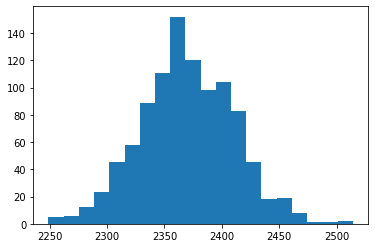

In [186]:
plt.hist(counts, bins=20)
plt.show()

In [188]:
mean = sum(counts)/len(counts)
print(mean)

2369.682


*The mean is approximetaly 2369, and our 'yes' rate in Rosiglitazone treatment is 2593, which is far beyond the mean and is an outlier (we can see it visually). We should reject H_o. Treatments are not independent.*